In [48]:
import numpy as np
import matplotlib.pyplot as plt

#Defining the the basic states of the quantum bits in their Array formats.

zero = np.array([[1],[0]]) #array of basic state |0>
one = np.array([[0],[1]]) # array of the basic state |1>

#Now defining the Hadmard gate array
H = (1 / np.sqrt(2)) * np.array([[1, 1], [1, -1]]) 

#Now that we have defined the arrays let's move on the next step of getting them in the superposition state.

def Superposition(n_qubits):
    state = zero
    for _ in range(n_qubits -1):
        state = np.kron(state , zero) # convert the arrays to the tensor product.
    hudmard_use = apply_hadamard(n_qubits)
    return hudmard_use.dot(state)

def apply_hadamard(n_qubits):
    H_n = np.array([[1]])
    for _ in range(n_qubits):
        H_n = np.kron(H_n, H)  # Apply Hadamard on each qubit
    return H_n

#Now that we have made sure that all the qubits have same probability of coming , let's define oracle to mark the target.

def oracle(target_index , num_states):
#We can define one target or multiple ones depending on the need , but for now we will be sticking to one target .
    oracle_matrix = np.eye(num_states)
    oracle_matrix[target_index, target_index] = -1  # Flip the phase of target state
    return oracle_matrix

#moving on to the next step of increasing the probability of our target index , let's define our diffusion.
def diffusion(n_qubits):
    num_states = 2 ** n_qubits
    superposition_state = Superposition(n_qubits)
    avg_matrix = 2 * np.outer(superposition_state, superposition_state) / num_states
    identity = np.eye(num_states)
    return avg_matrix - identity

#Now that we have defined our Oracle and diffusion operator let's move on to implementing the grover's algorithm.
def grover_algorithm(n_qubits, target_index, num_iterations):
    # Initialize system in superposition
    state = Superposition(n_qubits)
    
    # Define Oracle and Diffusion operators
    num_states = 2 ** n_qubits
    oracle_matrix = oracle(target_index, num_states)
    diffusion_matrix = diffusion(n_qubits)
    
    # Apply Grover iterations
    for i in range(num_iterations):
        state = oracle_matrix.dot(state)  # Apply Oracle
        state = diffusion_matrix.dot(state) # Apply Diffusion
        plot_probabilities(state, i + 1) 
    print(state)
    return state
def measure_state(state):
    probabilities = np.abs(state)**2
    print("Probabilities of each state:", probabilities)  # Debug line
    target_index = np.argmax(probabilities)
    return f"{target_index:0{len(bin(len(state))[2:])-1}b}"

# Function to plot the probability distribution
def plot_probabilities(state, iteration):
    probabilities = np.abs(state)**2  # Calculate the probability distribution
    
    # Create a bar chart of the state probabilities
    plt.figure(figsize=(8, 6))
    plt.bar(range(len(probabilities)), probabilities.flatten())
    plt.xlabel('State (index)')
    plt.ylabel('Probability')
    plt.title(f'Probability Distribution after {iteration} iteration(s)')
    
    # Label the x-axis with the binary representation of each state
    plt.xticks(range(len(probabilities)), [f'{i:0{len(bin(len(probabilities)))-2}b}' for i in range(len(probabilities))])
    plt.show()
                
    

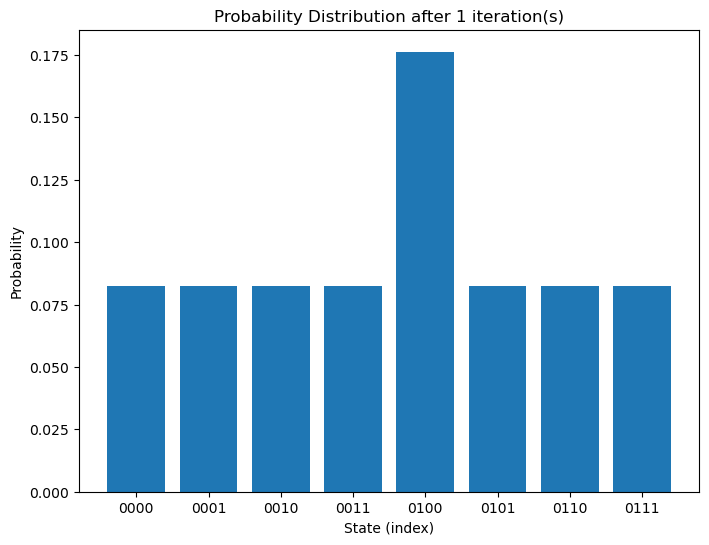

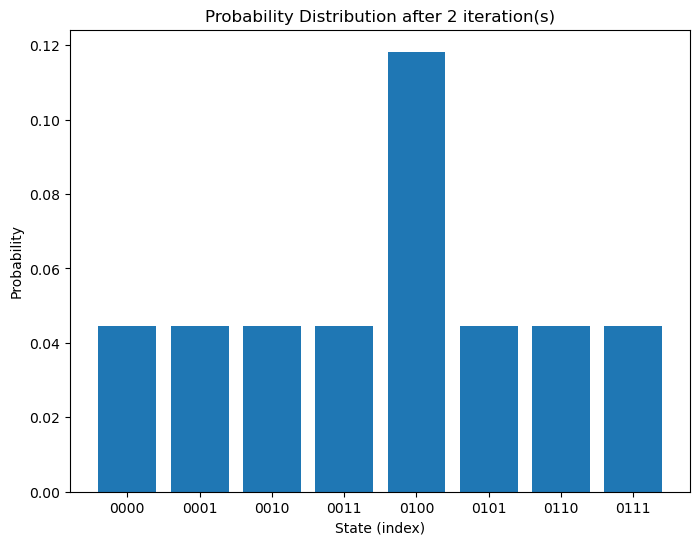

[[0.21130339]
 [0.21130339]
 [0.21130339]
 [0.21130339]
 [0.34388592]
 [0.21130339]
 [0.21130339]
 [0.21130339]]
Probabilities of each state: [[0.04464912]
 [0.04464912]
 [0.04464912]
 [0.04464912]
 [0.11825752]
 [0.04464912]
 [0.04464912]
 [0.04464912]]
The target state is: 100 (binary for target state)


In [49]:
# Example Execution
n_qubits = 3  # Number of qubits
target_index = 4  # Index of the target state (e.g., |100> = 4)
num_iterations = int(np.sqrt(2**n_qubits))  # Number of iterations for Grover's algorithm

# Run Grover's Algorithm
final_state = grover_algorithm(n_qubits, target_index, num_iterations)
solution = measure_state(final_state)

# Output the result
print(f"The target state is: {solution} (binary for target state)")
